In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from datasets import load_dataset
import numpy as np
import pandas as pd
from transformers import DataCollatorForLanguageModeling,TextDataset,GPTNeoForCausalLM,GPT2TokenizerFast,Seq2SeqTrainingArguments,Seq2SeqTrainer
import torch

**Downloading and extracting glove.vectors**

In [2]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [3]:
# !unzip glove*.zip

In [4]:
# !ls
# !pwd

In [5]:
# print('Indexing word vectors.')

# embeddings_index = {}
# f = open('glove.6B.100d.txt', encoding='utf-8')
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

In [6]:
data=load_dataset('allenai/scitldr','Abstract')

  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
data

DatasetDict({
    train: Dataset({
        features: ['source', 'source_labels', 'rouge_scores', 'paper_id', 'target'],
        num_rows: 1992
    })
    test: Dataset({
        features: ['source', 'source_labels', 'rouge_scores', 'paper_id', 'target'],
        num_rows: 618
    })
    validation: Dataset({
        features: ['source', 'source_labels', 'rouge_scores', 'paper_id', 'target'],
        num_rows: 619
    })
})

In [8]:
train=data['train']
test=data['test']

In [9]:
test

Dataset({
    features: ['source', 'source_labels', 'rouge_scores', 'paper_id', 'target'],
    num_rows: 618
})

In [10]:
train_df=pd.DataFrame()
test_df=pd.DataFrame()
train_df['source']=train['target']
train_df['target']=train['source']
test_df['source']=test['target']
test_df['target']=test['source']

In [11]:
def appending(dataframe,column):
  x,y=[],[]
  for i in range(len(list(dataframe[column]))):
    x=''
    for j in range(len(list(dataframe[column][i]))):
      x=x+dataframe[column][i][j]
    y.append(x)
  return(y)

train_df['source']=appending(train_df,'source')
train_df['target']=appending(train_df,'target')
test_df['source']=appending(test_df,'source')
test_df['target']=appending(test_df,'target')

In [12]:
train_df.to_csv("train.csv",index=False)
test_df.to_csv('test.csv',index=False)

In [13]:
# train_df.keys()

In [14]:
from transformers import AutoModelForCausalLM,AutoTokenizer

In [15]:
model=AutoModelForCausalLM.from_pretrained("bigscience/bloom-560m")
tokenizer=AutoTokenizer.from_pretrained("bigscience/bloom-560m")

In [16]:
train_df.keys()

Index(['source', 'target'], dtype='object')

In [17]:
# max_len=max((len(train_df['source'][i]) for i in range(len(list(train_df['source'])))))

In [18]:
# decoder_input_ids,decoder_attention_mask=[],[]
# tokenizer.pad_token = tokenizer.eos_token
# for i in range(len(list(train_df['source']))):
#   x=tokenizer(train_df['source'][i],padding='max_length',max_length=max_len,truncation=True,return_tensors='pt')
#   decoder_input_ids.append(x['input_ids'])
#   decoder_attention_mask.append(x['attention_mask'])

In [19]:
# max_len=max((len(train_df['target'][i]) for i in range(len(list(train_df['target'])))))

In [20]:
# input_ids,attention_mask=[],[]
# tokenizer.pad_token = tokenizer.eos_token
# for i in range(len(list(train_df['target']))):
#   x=tokenizer(train_df['target'][i],padding='max_length',max_length=max_len,truncation=True,return_tensors='pt')
#   input_ids.append(x['input_ids'])
#   attention_mask.append(x['attention_mask'])

In [21]:
# labels=decoder_input_ids

In [22]:
train_df1=TextDataset(tokenizer=tokenizer,file_path='/content/train.csv',block_size=200)
test_df1=TextDataset(tokenizer=tokenizer,file_path='/content/test.csv',block_size=200)

/usr/local/lib/python3.9/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [23]:
# train_data_tensor={'input_ids':input_ids,'attention_mask':attention_mask,'decoder_input_ids':decoder_input_ids,'decoder_attention_mask':decoder_attention_mask,'labels':labels}

In [24]:
# tensor_train=pd.DataFrame()
# tensor_train['input_ids']=input_ids
# tensor_train

In [25]:
# import pandas as pd
# import torch
# from torch.utils.data import Dataset

# class CustomDataset(Dataset):
#     def __init__(self, data):
#         self.data = data
        
#     def __len__(self):
#         return len(self.data)
        
#     def __getitem__(self, index):
#         # Convert the inputs and outputs to tensors
#         input_ids = torch.tensor(self.data.iloc[index]['input_ids'])
#         attention_mask = torch.tensor(self.data.iloc[index]['attention_mask'])
#         decoder_input_ids = torch.tensor(self.data.iloc[index]['decoder_input_ids'])
#         decoder_attention_mask = torch.tensor(self.data.iloc[index]['decoder_attention_mask'])
#         labels = torch.tensor(self.data.iloc[index]['labels'])
        
#         # Return the tensors as a dictionary
#         return {
#             'input_ids': input_ids,
#             'attention_mask': attention_mask,
#             'decoder_input_ids': decoder_input_ids,
#             'decoder_attention_mask': decoder_attention_mask,
#             'labels': labels
#         }
        
# # Convert the train and eval datasets to Pandas DataFrame format
# train_df = pd.DataFrame(train_data)
# eval_df = pd.DataFrame(eval_data)

# # Convert the DataFrame to PyTorch Dataset format
# train_dataset = CustomDataset(train_df)
# eval_dataset = CustomDataset(eval_df)


In [26]:
# train_data_tensor.keys()

In [27]:
data_collator=DataCollatorForLanguageModeling(mlm=False,tokenizer=tokenizer)

In [28]:
trainer_args=Seq2SeqTrainingArguments(output_dir='/content',
                                      num_train_epochs=15,
                                      learning_rate=0.00123,
                                      per_device_train_batch_size=16,
                                      per_device_eval_batch_size=32,
                                      eval_steps=200,
                                      warmup_steps=500,fp16=True,
                                      )
mod=Seq2SeqTrainer(model=model,tokenizer=tokenizer,
                   args=trainer_args,
                   data_collator=data_collator,
                   train_dataset=train_df1,
                   eval_dataset=test_df1)

In [29]:
mod.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


OutOfMemoryError: ignored

In [65]:
model.save_pretrained('new_mod')
tokenizer.save_pretrained('new_tok')

('new_tok/tokenizer_config.json',
 'new_tok/special_tokens_map.json',
 'new_tok/vocab.json',
 'new_tok/merges.txt',
 'new_tok/added_tokens.json',
 'new_tok/tokenizer.json')

In [66]:
m1=GPTNeoForCausalLM.from_pretrained('new_mod')
t1=GPT2TokenizerFast.from_pretrained('new_tok')

In [72]:
input = "AI/ML is going to play a critical role in solving the problem. Its important to aggregate data of customers in terms of demographics, booking history, service consumption patterns and promotional offers, seasonality etc. We would need the data for AI/ML to comfortably decipher unseen patterns which lead to car cancellations and preempt a possible car cancellation."
input_ids = t1.encode(input, return_tensors="pt")

In [73]:
output = m1.generate(
    input_ids=input_ids,
    do_sample=True,min_length=100, 
    max_length=200, 
    top_p=0.95, 
    top_k=50
)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


AI/ML is going to play a critical role in solving the problem. Its important to aggregate data of customers in terms of demographics, booking history, service consumption patterns and promotional offers, seasonality etc. We would need the data for AI/ML to comfortably decipher unseen patterns which lead to car cancellations and preempt a possible car cancellation.We propose a reinforcement learning based variable swapping policy which allows for a richer and multi-level learning of the trade-off.We examine the benefits of differential programming languages and show that they lead to much better end-to-end training of the neural network.We show that current choices in programming enable this RL-RL approach significantly better than supervised learning alone.We analyze the differences between these three distinct languages.","We show that current choices in programming enable the training of the neural network toetics-guided reinforcement learning significantly better than supervised lea

In [ ]:
# d1=pd.DataFrame()
# d1['text']=source[0:3000]
# d1['target']=target[0:3000]

# d2=pd.DataFrame()
# d2['text']=source_test[0:30]
# d2['target']=target_test[0:30]

# model=GPTNeoForCausalLM.from_pretrained('EleutherAI/gpt-neo-125M')
# tokenizer=GPT2Tokenizer.from_pretrained('EleutherAI/gpt-neo-125M')

# tokenizer.pad_token = tokenizer.eos_token
# input_ids,attention_mask,labels=[],[],[]
# for i in range(d1.shape[0]):
#   t=tokenizer(d1['text'][i],padding='max_length',max_length=10,truncation=True)
#   attention_mask.append(t['attention_mask'])
#   input_ids.append(t['input_ids'])
#   l=tokenizer(d1['target'][i])['input_ids']
#   labels.append(l)

# tokenizer.pad_token = tokenizer.eos_token
# input_ids_test,attention_mask_test,labels_test=[],[],[]
# for i in range(d2.shape[0]):
#   t=tokenizer(d2['text'][i],padding='max_length',max_length=10,truncation=True)
#   attention_mask_test.append(t['attention_mask'])
#   input_ids_test.append(t['input_ids'])
#   l=tokenizer(d2['target'][i])['input_ids']
#   labels_test.append(l)

# d1['input_ids']=input_ids
# d1['attention_mask']=attention_mask
# d1['target_labels']=labels

# d2['input_ids']=input_ids_test
# d2['attention_mask']=attention_mask_test
# d2['target_labels']=labels_test

# train=d1[['input_ids','attention_mask','target_labels']]
# train.columns=['input_ids','attention_mask','labels']

# test=d2[['input_ids','attention_mask','target_labels']]
# test.columns=['input_ids','attention_mask','labels']

# data_collator=DataCollatorForLanguageModeling(tokenizer=tokenizer,return_tensors='tf',mlm=False)

# data_train=Dataset.from_pandas(train)
# data_test=Dataset.from_pandas(test)

# args=TrainingArguments(output_dir='./results/',num_train_epochs=2,learning_rate=0.00123,per_device_train_batch_size=3,per_device_eval_batch_size=6)
# trainer=Trainer(model=model,args=args,data_collator=data_collator,train_dataset=data_train,eval_dataset=data_test)

# trainer.train()

# tf_dataset = model.prepare_tf_dataset(train, batch_size=16, shuffle=True, tokenizer=tokenizer)

In [ ]:
# # load the whole embedding into memory
# embeddings_index = dict()
# f = open('../input/glove6b/glove.6B.300d.txt')

# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs

# f.close()
# print('Loaded %s word vectors.' % len(embeddings_index))

In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.utils import pad_sequences

In [ ]:
# tokenizer=Tokenizer()

In [ ]:
# import pandas as pd

In [ ]:
# def tokenize_pad(dataframe,column_name):
#   x=[]
#   for i in range(len(dataframe[column_name])):
#     y=''
#     for j in range(len(dataframe[column_name][i])):
#       y=y+dataframe[column_name][i][j]
#     x.append(y)
#   return x
    
# x_train=pd.DataFrame()
# x_train['source']=tokenize_pad(train_df,'source')
# x_train['target']=tokenize_pad(train_df,'target')

# x=x_train['source'].append(x_train['target'])
# tokenizer.fit_on_texts(x)

<ipython-input-44-d99e72babd2d>:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x=x_train['source'].append(x_train['target'])


In [ ]:
# x_train['source']=tokenizer.texts_to_sequences(x_train['source'])
# x_train['target']=tokenizer.texts_to_sequences(x_train['target'])

In [ ]:
# x_train['source']=list(pad_sequences(x_train['source'],padding='post'))
# x_train['target']=list(pad_sequences(x_train['target'],padding='post'))

In [ ]:
# x_train.head()

,source,target
0,"[340, 3, 1, 385, 2, 34, 12, 3, 568, 4, 394, 2,...","[6, 159, 1211, 5, 1058, 2348, 1455, 9, 1, 575,..."
1,"[1, 919, 2816, 54, 10, 215, 3610, 3, 29, 1717,...","[1717, 1566, 12, 107, 974, 1602, 2030, 67, 93,..."
2,"[6, 115, 1, 254, 4851, 577, 19, 1421, 2, 1, 57...","[6, 115, 1, 254, 4851, 577, 5, 32, 8, 14, 100,..."
3,"[6, 105, 760, 163, 578, 5516, 578, 4, 64, 1032...","[591, 1676, 69, 278, 238, 70, 2885, 36, 760, 1..."
4,"[156, 2106, 11, 621, 34, 28, 13, 533, 2252, 28...","[6, 31, 4, 213, 1635, 1804, 54, 9, 28, 8, 1481..."


In [ ]:
# # create a weight matrix for words in training docs
# size_of_vocabulary=len(tokenizer.word_counts)
# embedding_matrix = np.zeros((size_of_vocabulary, 100))

# for word, i in tokenizer.word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         embedding_matrix[i] = embedding_vector

In [ ]:
# embedding_matrix.shape

(12691, 100)

In [ ]:
# len(x_train['source'][0])

183

In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import *
# from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# model=Sequential()
# model.add(Embedding(size_of_vocabulary,100,weights=[embedding_matrix],input_length=500,trainable=True))
# model.add(Bidirectional(LSTM(units=256,input_shape=(500,1),return_sequences=True,dropout=0.2)))
# model.add(Bidirectional(LSTM(128,return_sequences=True,dropout=0.2)))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(500,activation='selu'))
# model.add(Dense(106,input_shape=(1,106),activation='sigmoid'))

# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
# import tensorflow.keras.backend as K

# K.clear_session()

In [ ]:
# from keras.models import Sequential
# from keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPooling1D, Dense,BatchNormalization

# model = Sequential()

# model.add(Embedding(size_of_vocabulary, 100, weights=[embedding_matrix], input_length=106, trainable=True))
# model.add(Bidirectional(LSTM(units=900, return_sequences=True, dropout=0.1, input_shape=(106, 100))))
# model.add(Bidirectional(LSTM(units=700, return_sequences=True)))
# model.add(Bidirectional(LSTM(units=500, return_sequences=True, dropout=0.1)))
# model.add(Bidirectional(LSTM(units=300, return_sequences=True)))
# model.add(Bidirectional(LSTM(units=200, return_sequences=True, dropout=0.1)))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(units=1000, activation='selu'))
# model.add(Dense(units=500,activation='gelu'))
# model.add(Dense(units=500, activation='softmax'))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# #es = EarlyStopping(monitor='val_loss')


In [ ]:
# print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 106, 100)          1269100   
                                                                 
 bidirectional (Bidirectiona  (None, 106, 1800)        7207200   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 106, 1400)        14005600  
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 106, 1000)        7604000   
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 106, 600)         3122400   
 nal)                                                   

In [ ]:
# np_a1,np_a2=[],[]
# for i in range(x_train.shape[0]):
#   np_a1.append(np.asarray(x_train['target'][i]).astype("float32"))
#   np_a2.append(np.asarray(x_train['source'][i]).astype("float32"))

In [ ]:
# x=np.expand_dims(np_a1,axis=0)
# x=x.reshape((x.shape[1],x.shape[2],x.shape[0]))
# x.shape

(1992, 106, 1)

In [ ]:
# y=np.expand_dims(np_a2,axis=0)

In [ ]:
# y=y.reshape((y.shape[1],y.shape[2],y.shape[0]))
# y=np.squeeze(y,axis=2)

In [ ]:
# y.shape

(1992, 500)

In [ ]:
# history=model.fit(x=x,y=y,epochs=25,verbose='auto',batch_size=32)

In [32]:
input = "AI/ML is going to play a critical role in solving the problem. Its important to aggregate data of customers in terms of demographics, booking history, service consumption patterns and promotional offers, seasonality etc. We would need the data for AI/ML to comfortably decipher unseen patterns which lead to car cancellations and preempt a possible car cancellation {}."

In [33]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Define the input text
input_text = input

# Tokenize the input text and add special tokens [CLS] and [SEP]
input_ids = tokenizer.encode(input_text, add_special_tokens=True)
input_ids = torch.tensor([input_ids])

# Generate the explanation using the BERT model
outputs = model(input_ids)
logits = outputs[0]
explanation = torch.argmax(logits, dim=1).item()

# Convert the explanation back to text
explanation_text = "The model predicts that the input text is {}.".format(explanation)

print(explanation_text)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

The model predicts that the input text is 1.


In [34]:
explanation

1

In [35]:
logits

tensor([[0.0436, 0.0968]], grad_fn=<AddmmBackward0>)

In [36]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[0.0436, 0.0968]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [37]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define the input text
input_text = "The movie was really good. I enjoyed it a lot."

# Tokenize the input text and add special tokens [CLS] and [SEP]
inputs = tokenizer.encode_plus(input_text, return_tensors="pt", padding=True, truncation=True)

# Generate the explanation using the BERT model
outputs = model(**inputs)
logits = outputs.logits
explanation = torch.argmax(logits, dim=1).item()

# Convert the explanation back to text
explanation_text = "The model predicts that the input text is {}.".format(explanation)

print(explanation_text)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

The model predicts that the input text is 0.


In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, Bidirectional, Attention
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("text_data.csv")

# Split the data into training and validation sets
train_data = df.sample(frac=0.8, random_state=42)
val_data = df.drop(train_data.index)

# Preprocess the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data["text"])

X_train = tokenizer.texts_to_sequences(train_data["text"])
X_train = pad_sequences(X_train, maxlen=100)

X_val = tokenizer.texts_to_sequences(val_data["text"])
X_val = pad_sequences(X_val, maxlen=100)

y_train = np.array(train_data["label"])
y_val = np.array(val_data["label"])

# Define the attention-based model
input_layer = Input(shape=(100,))
embedding_layer = Embedding(input_dim=10000, output_dim=100, input_length=100)(input_layer)
lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
attention_layer = Attention()(lstm_layer)
dropout_layer = Dropout(0.5)(attention_layer)
output_layer = Dense(1, activation="sigmoid")(dropout_layer)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile and train the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

# Generate explanations for the predictions
idx = 0 # Index of the input to explain
weights = model.layers[2].get_weights()[0] # Get the weights of the embedding layer
input_text = val_data.iloc[idx]["text"] # Get the input text to explain

# Convert the input text to a sequence of word indices
input_seq = tokenizer.texts_to_sequences([input_text])
input_seq = pad_sequences(input_seq, maxlen=100)

# Get the attention weights for the input sequence
attention_weights = model.predict(input_seq)[0]
attention_weights = np.resize(attention_weights, (100,))

# Calculate the weighted average of the embedding vectors
embeddings = weights[input_seq][0]
weighted_embeddings = np.multiply(embeddings, attention_weights[:, np.newaxis])
context_vector = np.sum(weighted_embeddings, axis=0)

# Generate the explanation
top_words_idx = np.argsort(context_vector)[::-1][:10] # Get the indices of the top words
top_words = [tokenizer.index_word[idx] for idx in top_words_idx] # Convert the indices to words
explanation = f"The model is most focused on the words {', '.join(top_words)} when predicting this input."
print(explanation)


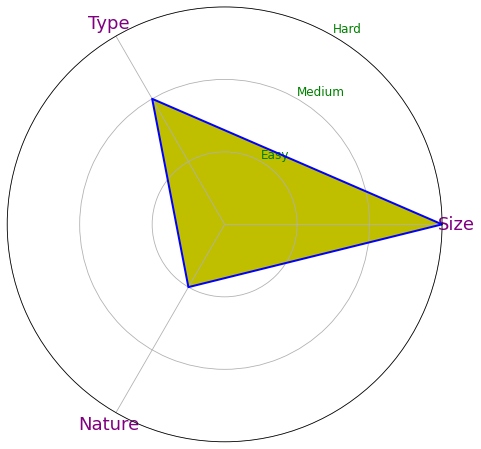

In [47]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'Data': ['Complexity'],
'Size': [30],
'Type': [20],
'Nature': [10]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('Data').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='purple', size=18)
 
# Draw ylabels
ax.set_rlabel_position(60)
plt.yticks([10,20,30], ["Easy","Medium","Hard"], color="Green", size=12)
plt.ylim(0,30)
 
# Plot data
ax.plot(angles, values, linewidth=2, linestyle='solid',color='blue')
# Fill area
ax.fill(angles, values, 'y', alpha=1)

# Show the graph
plt.show()

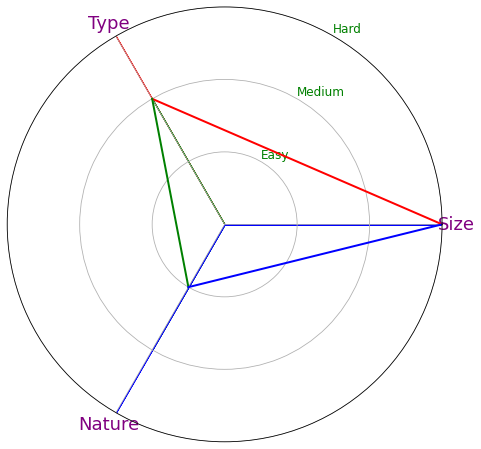

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
    'Data': ['Complexity'],
    'Size': [30],
    'Type': [20],
    'Nature': [10]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('Data').values.flatten().tolist()
values += values[:1]
values
 
# Define colors for the values
colors = ['red', 'green', 'blue', 'purple', 'orange']
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='purple', size=18)
 
# Draw ylabels
ax.set_rlabel_position(60)
plt.yticks([10,20,30], ["Easy","Medium","Hard"], color="Green", size=12)
plt.ylim(0,30)
 
# Plot data with different colors
for i in range(len(values)-1):
    ax.plot([angles[i], angles[i+1]], [values[i], values[i+1]], 
            linewidth=2, linestyle='solid', color=colors[i])
    ax.fill_betweenx([0,values[i],values[i+1],0], angles[i], angles[i+1], 
                     color=colors[i], alpha=1)

# Show the graph
plt.show()

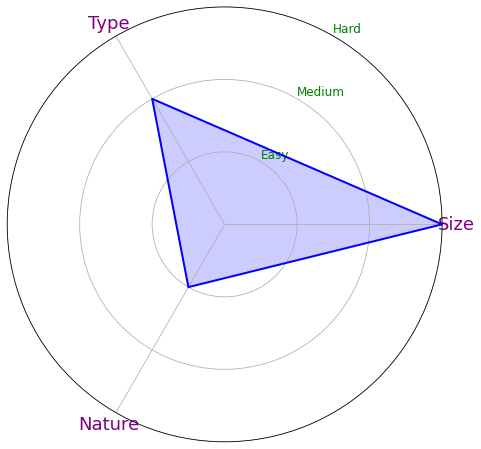

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Set data
df = pd.DataFrame({
    'Data': ['Complexity'],
    'Size': [30],
    'Type': [20],
    'Nature': [10]
})

# number of variables
categories = list(df)[1:]
N = len(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = df.loc[0].drop('Data').values.flatten().tolist()
values += values[:1]

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Draw one axis per variable + add labels
plt.xticks(angles[:-1], categories, color='purple', size=18)

# Draw ylabels
ax.set_rlabel_position(60)
plt.yticks([10, 20, 30], ["Easy", "Medium", "Hard"], color="Green", size=12)
plt.ylim(0, 30)

# Plot data
ax.plot(angles, values, linewidth=2, linestyle='solid', color='blue')

# Fill area between lines
ax.fill(angles, values, 'blue', alpha=0.2)

# Show the graph
plt.show()


ValueError: ignored

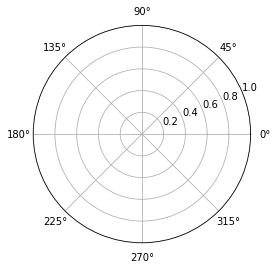

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# create data for the plot
categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
values =  [4, 3, 2, 1, 5]
colors = ['red', 'blue', 'green', 'purple', 'orange']

# create the figure and axis objects
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# plot the data as a radar chart with different colors for each radial axis
for i in range(len(values)):
    ax.plot(np.linspace(0, 2*np.pi, len(categories), endpoint=False), categories[i], color=colors[i])
    ax.fill(np.linspace(0, 2*np.pi, len(categories), endpoint=False), values[i], alpha=0.3)

# hide the radial axis

# set the category labels
ax.set_xticks(np.linspace(0, 2*np.pi, len(categories), endpoint=False))
ax.set_xticklabels(categories)

# show the plot
plt.show()
